In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import seaborn as sns
height,width=208,176

### Loading the data from the private drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = "/content/drive/MyDrive/Works/AlzheimerDataset/train/NonDemented"

# Initialize empty lists to store the images and labels
train_NonDemented = []
labels_train_NonDemented = []
# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a valid image file
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        continue

    # Read the image using OpenCV
    image = cv2.imread(file_path)

    # Add the image to the list of images
    train_NonDemented.append(image)
    labels_train_NonDemented.append(0)

train_NonDemented = np.array(train_NonDemented)
labels_train_NonDemented = np.array(labels_train_NonDemented)

In [ ]:
folder_path = "/content/drive/MyDrive/Works/AlzheimerDataset/train/VeryMildDemented"

# Initialize empty lists to store the images and labels
train_VeryMildDemented = []
labels_train_VeryMildDemented = []
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a valid image file
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        continue

    # Read the image using OpenCV
    image = cv2.imread(file_path)

    # Add the image to the list of images
    train_VeryMildDemented.append(image)
    labels_train_VeryMildDemented.append(1)

train_VeryMildDemented = np.array(train_VeryMildDemented)
labels_train_VeryMildDemented = np.array(labels_train_VeryMildDemented)

In [ ]:
folder_path = "/content/drive/MyDrive/Works/AlzheimerDataset/train/MildDemented"

# Initialize empty lists to store the images and labels
train_MildDemented = []
labels_train_MildDemented = []
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a valid image file
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        continue

    # Read the image using OpenCV
    image = cv2.imread(file_path)

    # Add the image to the list of images
    train_MildDemented.append(image)
    labels_train_MildDemented.append(2)

train_MildDemented = np.array(train_MildDemented)
labels_train_MildDemented = np.array(labels_train_MildDemented)

In [ ]:
folder_path = "/content/drive/MyDrive/Works/AlzheimerDataset/train/ModerateDemented"

# Initialize empty lists to store the images and labels
train_ModerateDemented = []
labels_train_ModerateDemented = []
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a valid image file
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        continue

    # Read the image using OpenCV
    image = cv2.imread(file_path)

    # Add the image to the list of images
    train_ModerateDemented.append(image)
    labels_train_ModerateDemented.append(3)

train_ModerateDemented = np.array(train_ModerateDemented)
labels_train_ModerateDemented = np.array(labels_train_ModerateDemented)

In [ ]:
folder_path = "/content/drive/MyDrive/Works/AlzheimerDataset/test/NonDemented"

# Initialize empty lists to store the images and labels
test_NonDemented = []
labels_test_NonDemented = []
# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a valid image file
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        continue

    # Read the image using OpenCV
    image = cv2.imread(file_path)

    # Add the image to the list of images
    test_NonDemented.append(image)
    labels_test_NonDemented.append(0)

test_NonDemented = np.array(test_NonDemented)
labels_test_NonDemented = np.array(labels_test_NonDemented)

In [ ]:
folder_path = "/content/drive/MyDrive/Works/AlzheimerDataset/test/VeryMildDemented"

# Initialize empty lists to store the images and labels
test_VeryMildDemented = []
labels_test_VeryMildDemented = []
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a valid image file
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        continue

    # Read the image using OpenCV
    image = cv2.imread(file_path)

    # Add the image to the list of images
    test_VeryMildDemented.append(image)
    labels_test_VeryMildDemented.append(1)

test_VeryMildDemented = np.array(test_VeryMildDemented)
labels_test_VeryMildDemented = np.array(labels_test_VeryMildDemented)

In [ ]:
folder_path = "/content/drive/MyDrive/Works/AlzheimerDataset/test/MildDemented"

# Initialize empty lists to store the images and labels
test_MildDemented = []
labels_test_MildDemented = []
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a valid image file
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        continue

    # Read the image using OpenCV
    image = cv2.imread(file_path)

    # Add the image to the list of images
    test_MildDemented.append(image)
    labels_test_MildDemented.append(2)

test_MildDemented = np.array(test_MildDemented)
labels_test_MildDemented = np.array(labels_test_MildDemented)

In [ ]:
folder_path = "/content/drive/MyDrive/Works/AlzheimerDataset/test/ModerateDemented"

# Initialize empty lists to store the images and labels
test_ModerateDemented = []
labels_test_ModerateDemented = []
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a valid image file
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        continue

    # Read the image using OpenCV
    image = cv2.imread(file_path)

    # Add the image to the list of images
    test_ModerateDemented.append(image)
    labels_test_ModerateDemented.append(3)

test_ModerateDemented = np.array(test_ModerateDemented)
labels_test_ModerateDemented = np.array(labels_test_ModerateDemented)

In [ ]:
len(train_NonDemented),len(test_NonDemented),len(train_ModerateDemented),len(test_ModerateDemented),len(train_MildDemented),len(test_MildDemented),len(train_VeryMildDemented),len(test_VeryMildDemented)

(2560, 640, 52, 12, 717, 179, 1792, 448)

## Presentation of the different labels

Non Demented:


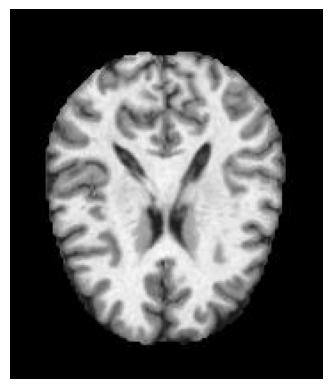

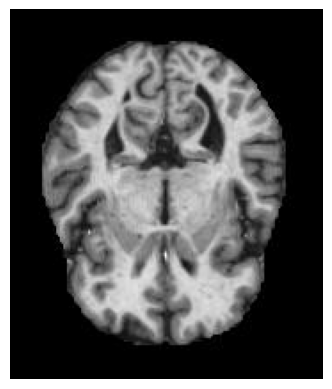

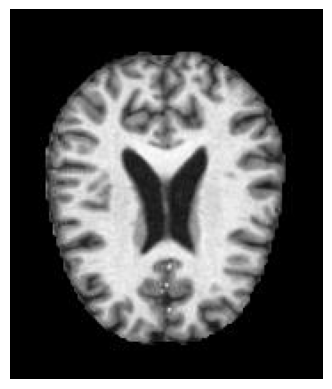

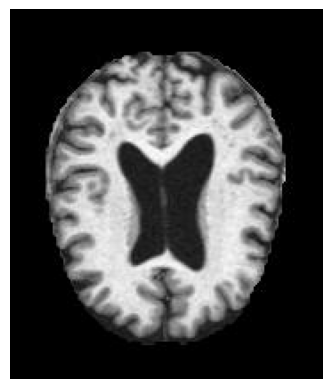

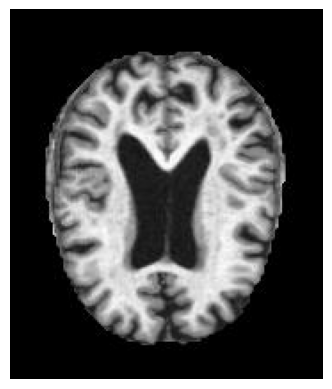

Moderate Demented:


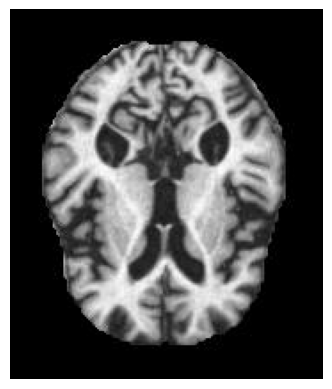

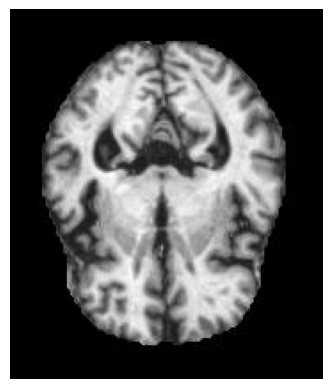

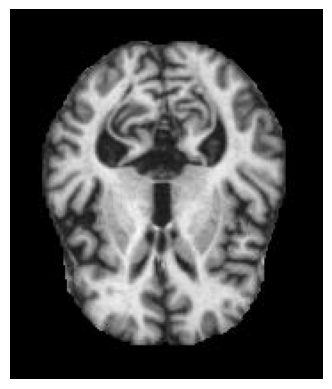

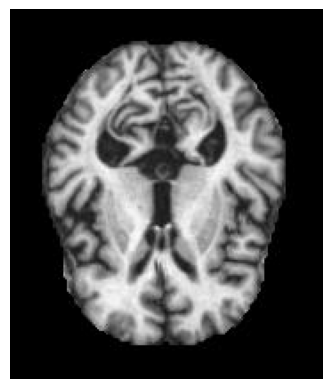

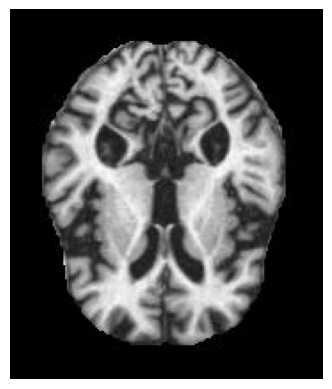

Mild Demented:


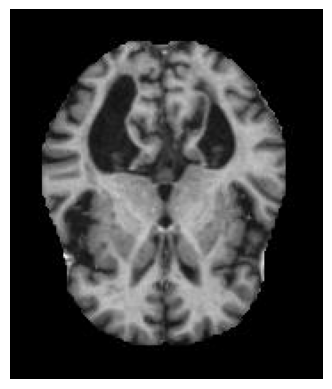

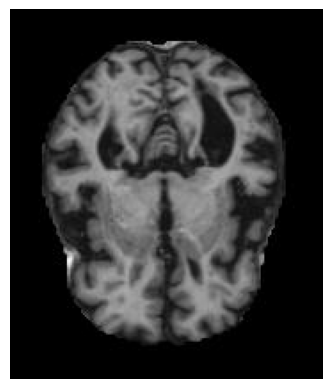

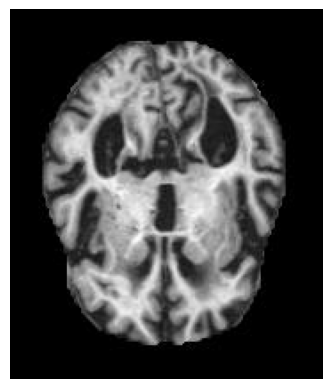

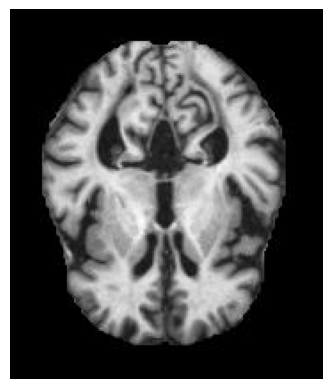

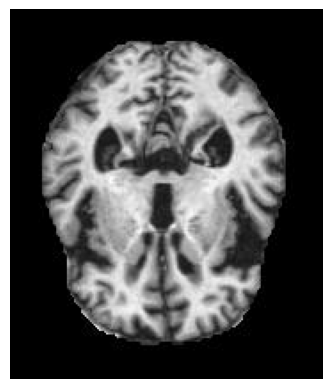

Very Mild Demented:


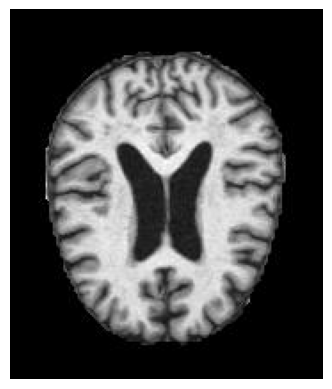

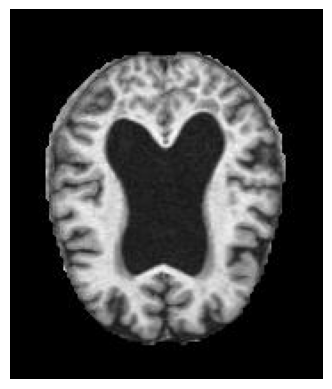

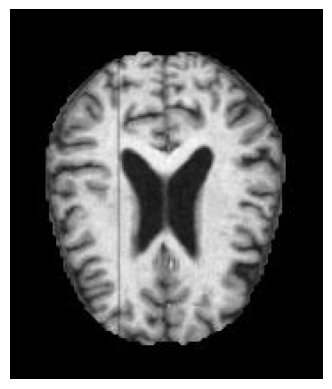

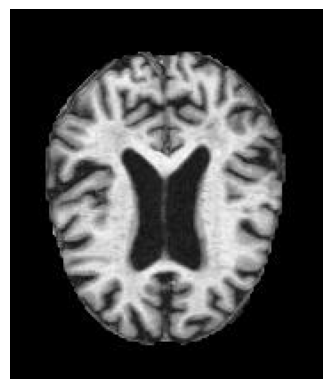

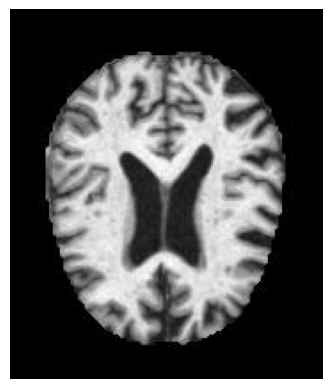

In [ ]:
print("Non Demented:")
for image in train_NonDemented[:5]:
    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()
print("Moderate Demented:")
for image in train_ModerateDemented[:5]:
    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()
print("Mild Demented:")
for image in train_MildDemented[:5]:
    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()
print("Very Mild Demented:")
for image in train_VeryMildDemented[:5]:
    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Preparing the dataset for classification

In [ ]:
x_train = np.concatenate((train_NonDemented,train_ModerateDemented,train_MildDemented,train_VeryMildDemented), axis=0)

In [ ]:
y_train = np.concatenate((labels_train_NonDemented,labels_train_ModerateDemented,labels_train_MildDemented,labels_train_VeryMildDemented), axis=0)

In [ ]:
x_test = np.concatenate((test_NonDemented,test_ModerateDemented,test_MildDemented,test_VeryMildDemented), axis=0)

In [ ]:
y_test = np.concatenate((labels_test_NonDemented,labels_test_ModerateDemented,labels_test_MildDemented,labels_test_VeryMildDemented), axis=0)

In [ ]:
x_train[0].shape

(208, 176, 3)

# Fully connected net

In [ ]:
input_size=(208,176,3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_size),  # Flatten the input images
    tf.keras.layers.Dense(256, activation='relu'),  # Fully connected layer with ReLU activation
    tf.keras.layers.Dense(256, activation='relu'),  # Fully connected layer with ReLU activation
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005,beta_1=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the train set
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=20)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(x_test)

Epoch 1/20
161/161 [==============================] - 4s 7ms/step - loss: 859.9296 - accuracy: 0.4784 - val_loss: 245.4971 - val_accuracy: 0.5364
Epoch 2/20
161/161 [==============================] - 1s 5ms/step - loss: 150.0320 - accuracy: 0.5405 - val_loss: 340.4024 - val_accuracy: 0.5012
Epoch 3/20
161/161 [==============================] - 1s 5ms/step - loss: 92.3114 - accuracy: 0.5897 - val_loss: 419.7864 - val_accuracy: 0.5004
Epoch 4/20
161/161 [==============================] - 1s 5ms/step - loss: 53.6365 - accuracy: 0.6348 - val_loss: 83.8023 - val_accuracy: 0.5082
Epoch 5/20
161/161 [==============================] - 1s 5ms/step - loss: 15.6679 - accuracy: 0.7659 - val_loss: 35.1164 - val_accuracy: 0.4699
Epoch 6/20
161/161 [==============================] - 1s 5ms/step - loss: 16.4505 - accuracy: 0.7317 - val_loss: 238.2560 - val_accuracy: 0.3503
Epoch 7/20
161/161 [==============================] - 1s 5ms/step - loss: 55.9468 - accuracy: 0.6122 - val_loss: 101.0120 - val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 109824)            0         
                                                                 
 dense (Dense)               (None, 256)               28115200  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 28,182,020
Trainable params: 28,182,020
Non-trainable params: 0
_________________________________________________________________


<Axes: >

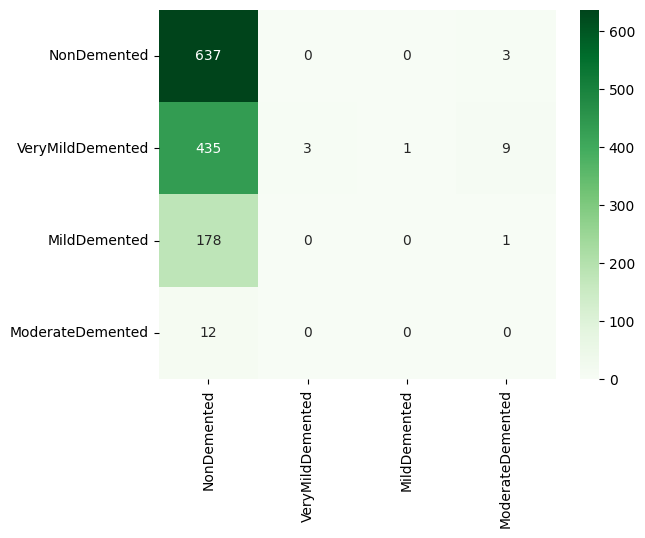

In [ ]:
predictions = np.argmax(predictions, axis=1)
df = pd.DataFrame(data = confusion_matrix(y_test, predictions),
  columns = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'],
  index = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'])
sns.heatmap(df, cmap="Greens", annot=True, fmt='.0f')

In [ ]:
print(classification_report(y_test,predictions,target_names= ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented']))

                  precision    recall  f1-score   support

     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       1.00      0.01      0.01       448
    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12

        accuracy                           0.50      1279
       macro avg       0.38      0.25      0.17      1279
    weighted avg       0.60      0.50      0.34      1279



# CNN (Convolutional Neural Net)

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(height, width, 3)),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005,beta_1=0.9),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

train_acc_values = []
val_acc_values = []

# Training loop
for epoch in range(25):
    # Train the model
    print("Epoch ",epoch+1,":")
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)

    # Get the accuracy values from the history
    train_acc = history.history['accuracy'][0]
    val_acc = history.history['val_accuracy'][0]

    # Append the accuracy values to the lists
    train_acc_values.append(train_acc)
    val_acc_values.append(val_acc)

# Evaluation on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {test_loss:.4f}')
print(f'Accuracy on the test set: {test_accuracy*100:.2f}%')

predictions = model.predict(x_test)

Epoch  1 :
161/161 [==============================] - 6s 13ms/step - loss: 4.9477 - accuracy: 0.5419 - val_loss: 0.9658 - val_accuracy: 0.5731
Epoch  2 :
161/161 [==============================] - 2s 11ms/step - loss: 0.7462 - accuracy: 0.6817 - val_loss: 1.1987 - val_accuracy: 0.5309
Epoch  3 :
161/161 [==============================] - 2s 11ms/step - loss: 0.5811 - accuracy: 0.7631 - val_loss: 2.0765 - val_accuracy: 0.3769
Epoch  4 :
161/161 [==============================] - 2s 11ms/step - loss: 0.4164 - accuracy: 0.8344 - val_loss: 1.1019 - val_accuracy: 0.6075
Epoch  5 :
161/161 [==============================] - 2s 11ms/step - loss: 0.2152 - accuracy: 0.9238 - val_loss: 2.1697 - val_accuracy: 0.4269
Epoch  6 :
161/161 [==============================] - 2s 11ms/step - loss: 0.5746 - accuracy: 0.7750 - val_loss: 1.1763 - val_accuracy: 0.6317
Epoch  7 :
161/161 [==============================] - 2s 11ms/step - loss: 0.2206 - accuracy: 0.9172 - val_loss: 1.3386 - val_accuracy: 0.6747

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 208, 176, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 104, 88, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 88, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 44, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 44, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 22, 128)     

<Axes: >

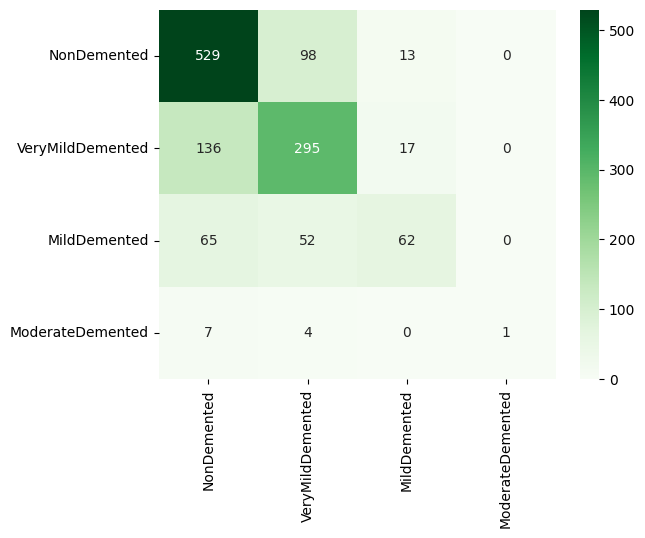

In [ ]:
predictions = np.argmax(predictions, axis=1)
df = pd.DataFrame(data = confusion_matrix(y_test, predictions),
  columns = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'],
  index = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'])
sns.heatmap(df, cmap="Greens", annot=True, fmt='.0f')

In [ ]:
print(classification_report(y_test,predictions,target_names= ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented']))

                  precision    recall  f1-score   support

     NonDemented       0.72      0.83      0.77       640
VeryMildDemented       0.66      0.66      0.66       448
    MildDemented       0.67      0.35      0.46       179
ModerateDemented       1.00      0.08      0.15        12

        accuracy                           0.69      1279
       macro avg       0.76      0.48      0.51      1279
    weighted avg       0.69      0.69      0.68      1279



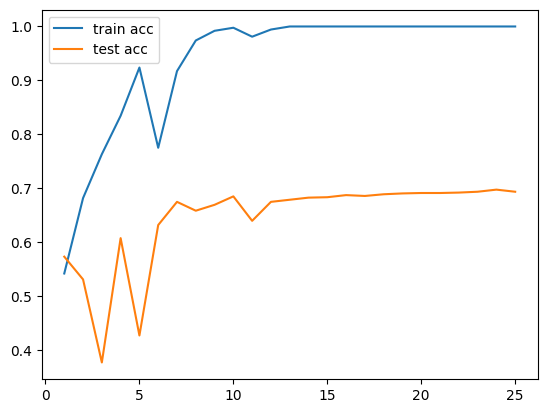

In [ ]:
lenx = [i+1 for i in range(len(train_acc_values))]
plt.plot(lenx, train_acc_values, label = "train acc")
plt.plot(lenx, val_acc_values, label = "test acc")
plt.legend()
plt.show()


# CNN with dropout layers

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(height, width, 3)),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),
    layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),
    layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),
    layers.Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00025,beta_1=0.9),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

train_acc_values = []
val_acc_values = []

# Training loop
for epoch in range(200):
    # Train the model
    print("Epoch ",epoch+1,":")
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)

    # Get the accuracy values from the history
    train_acc = history.history['accuracy'][0]
    val_acc = history.history['val_accuracy'][0]

    # Append the accuracy values to the lists
    train_acc_values.append(train_acc)
    val_acc_values.append(val_acc)

# Evaluation on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {test_loss:.4f}')
print(f'Accuracy on the test set: {test_accuracy*100:.2f}%')

predictions = model.predict(x_test)

Epoch  1 :
161/161 [==============================] - 6s 14ms/step - loss: 9.4015 - accuracy: 0.4505 - val_loss: 1.3042 - val_accuracy: 0.5059
Epoch  2 :
161/161 [==============================] - 2s 13ms/step - loss: 1.0537 - accuracy: 0.4851 - val_loss: 1.2952 - val_accuracy: 0.5004
Epoch  3 :
161/161 [==============================] - 2s 13ms/step - loss: 1.0474 - accuracy: 0.4884 - val_loss: 1.2849 - val_accuracy: 0.5027
Epoch  4 :
161/161 [==============================] - 2s 13ms/step - loss: 1.0448 - accuracy: 0.4866 - val_loss: 1.2804 - val_accuracy: 0.5035
Epoch  5 :
161/161 [==============================] - 2s 13ms/step - loss: 1.0454 - accuracy: 0.4905 - val_loss: 1.2377 - val_accuracy: 0.5004
Epoch  6 :
161/161 [==============================] - 2s 13ms/step - loss: 1.0378 - accuracy: 0.5007 - val_loss: 1.1888 - val_accuracy: 0.5004
Epoch  7 :
161/161 [==============================] - 2s 13ms/step - loss: 1.0280 - accuracy: 0.5003 - val_loss: 1.2043 - val_accuracy: 0.5004

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 208, 176, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 104, 88, 32)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 104, 88, 32)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 104, 88, 64)       18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 52, 44, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 52, 44, 64)       

<Axes: >

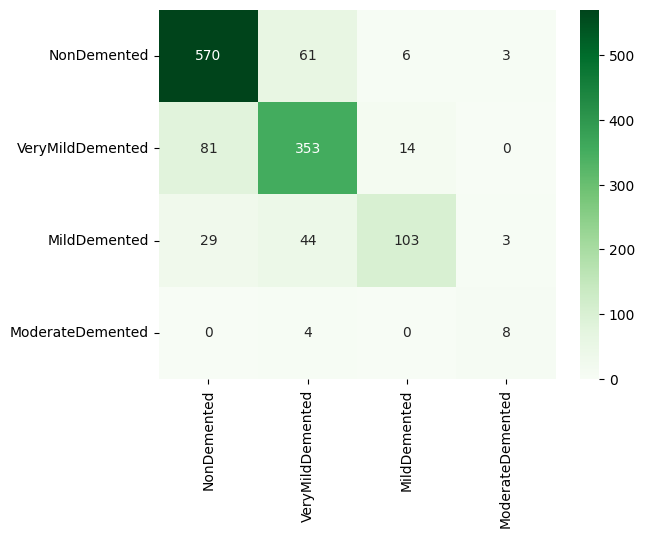

In [ ]:
predictions = np.argmax(predictions, axis=1)
df = pd.DataFrame(data = confusion_matrix(y_test, predictions),
  columns = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'],
  index = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'])
sns.heatmap(df, cmap="Greens", annot=True, fmt='.0f')

In [ ]:
print(classification_report(y_test,predictions,target_names= ['NonDemented', 'VeryMildDemented','MildDemented','ModerateDemented']))

                  precision    recall  f1-score   support

     NonDemented       0.84      0.89      0.86       640
VeryMildDemented       0.76      0.79      0.78       448
    MildDemented       0.84      0.58      0.68       179
ModerateDemented       0.57      0.67      0.62        12

        accuracy                           0.81      1279
       macro avg       0.75      0.73      0.73      1279
    weighted avg       0.81      0.81      0.81      1279



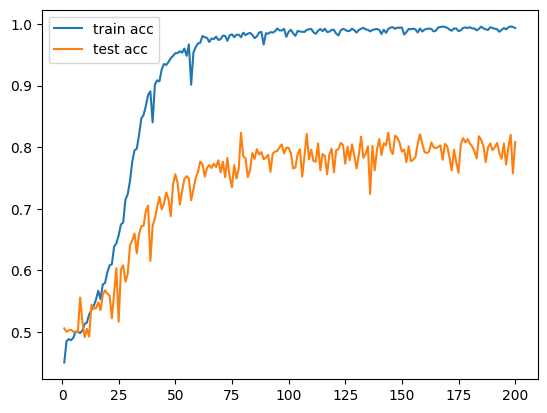

In [ ]:
lenx = [i+1 for i in range(len(train_acc_values))]
plt.plot(lenx, train_acc_values, label = "train acc")
plt.plot(lenx, val_acc_values, label = "test acc")
plt.legend()
plt.show()

# Grad Camera for detecting the alzheimer

In [ ]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = tf.keras.Model(
        inputs=[self.model.inputs],
        outputs=[self.model.get_layer(self.layerName).output,
                 self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap
    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        image = np.asarray(image, np.float64)
        heatmap = np.asarray(heatmap, np.float64)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        return (heatmap, output)

In [ ]:
def show_heatmap(model, img_path):
    image = load_img(img_path, target_size=(208, 176))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    i = np.argmax(preds[0])
    label_to_class = {'NonDemented': 0,
                      'VeryMildDemented': 3,
                      'MildDemented': 2,
                      'ModerateDemented': 1}

    class_to_label = {v: k for k, v in label_to_class.items()}

    label = class_to_label[i]
    print(f'Predicted class: {label} | Prediction probability: {max(preds[0]) * 100}%')

    cam = GradCAM(model, i)
    heatmap = cam.compute_heatmap(image)

    (heatmap, output) = cam.overlay_heatmap(heatmap, image[0], alpha=0.5)

    output = output.astype(np.uint8)
    plt.imshow(output, interpolation='nearest')
    plt.show()

# Presenting alzheimer detection

1/1 [==============================] - 0s 88ms/step
Predicted class: NonDemented | Prediction probability: 99.99579191207886%


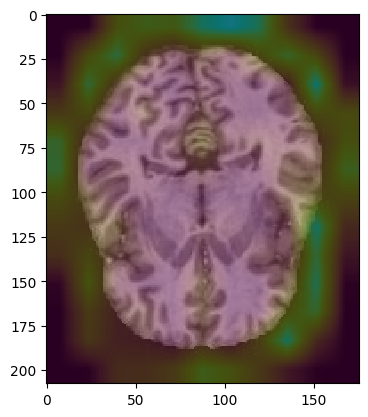

In [ ]:
img_path = "/content/drive/MyDrive/Works/AlzheimerDataset/train/NonDemented/nonDem3.jpg"
show_heatmap(model, img_path)

1/1 [==============================] - 0s 21ms/step
Predicted class: ModerateDemented | Prediction probability: 99.99891519546509%


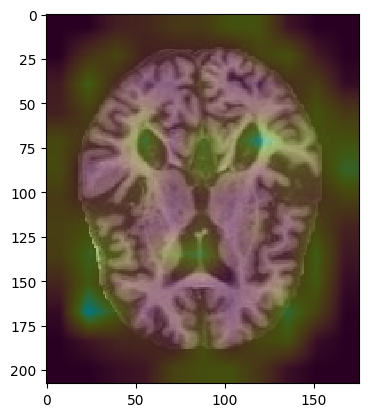

In [ ]:
img_path = "/content/drive/MyDrive/Works/AlzheimerDataset/train/VeryMildDemented/verymildDem793.jpg"
show_heatmap(model, img_path)

1/1 [==============================] - 0s 21ms/step
Predicted class: MildDemented | Prediction probability: 99.99814033508301%


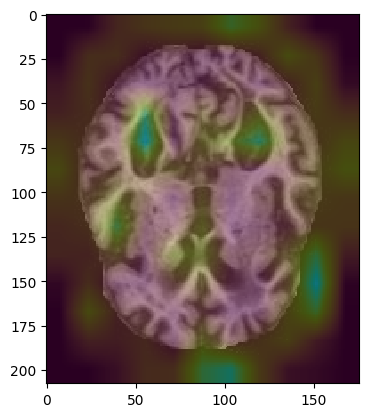

In [ ]:
img_path = "/content/drive/MyDrive/Works/AlzheimerDataset/train/MildDemented/mildDem66.jpg"
show_heatmap(model, img_path)

1/1 [==============================] - 0s 22ms/step
Predicted class: VeryMildDemented | Prediction probability: 99.9946117401123%


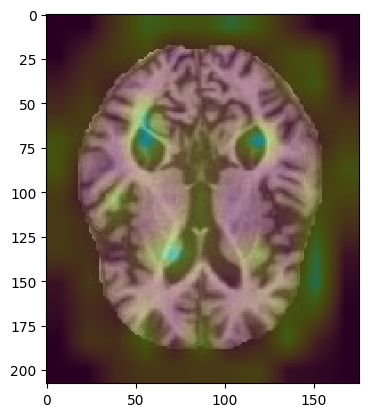

In [ ]:
img_path = "/content/drive/MyDrive/Works/AlzheimerDataset/train/ModerateDemented/moderateDem12.jpg"
show_heatmap(model, img_path)

# AlexNet

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(96, kernel_size=11, strides=4, padding='valid', activation='relu', input_shape=(height, width, 3)),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.Conv2D(384, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.Conv2D(384, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005,beta_1=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the train set
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(x_test)
predictions2 = model.predict(x_train)

Epoch 1/25
161/161 [==============================] - 5s 12ms/step - loss: 3.8892 - accuracy: 0.4665 - val_loss: 1.0565 - val_accuracy: 0.5004
Epoch 2/25
161/161 [==============================] - 1s 9ms/step - loss: 0.9937 - accuracy: 0.5116 - val_loss: 0.9882 - val_accuracy: 0.5520
Epoch 3/25
161/161 [==============================] - 1s 9ms/step - loss: 0.9164 - accuracy: 0.5684 - val_loss: 0.9495 - val_accuracy: 0.5575
Epoch 4/25
161/161 [==============================] - 1s 8ms/step - loss: 0.8362 - accuracy: 0.6055 - val_loss: 1.1639 - val_accuracy: 0.5567
Epoch 5/25
161/161 [==============================] - 1s 8ms/step - loss: 0.7531 - accuracy: 0.6542 - val_loss: 1.1804 - val_accuracy: 0.3815
Epoch 6/25
161/161 [==============================] - 1s 8ms/step - loss: 0.7051 - accuracy: 0.6798 - val_loss: 1.4696 - val_accuracy: 0.5426
Epoch 7/25
161/161 [==============================] - 1s 8ms/step - loss: 0.5631 - accuracy: 0.7553 - val_loss: 2.2455 - val_accuracy: 0.3526
Epoch

<Axes: >

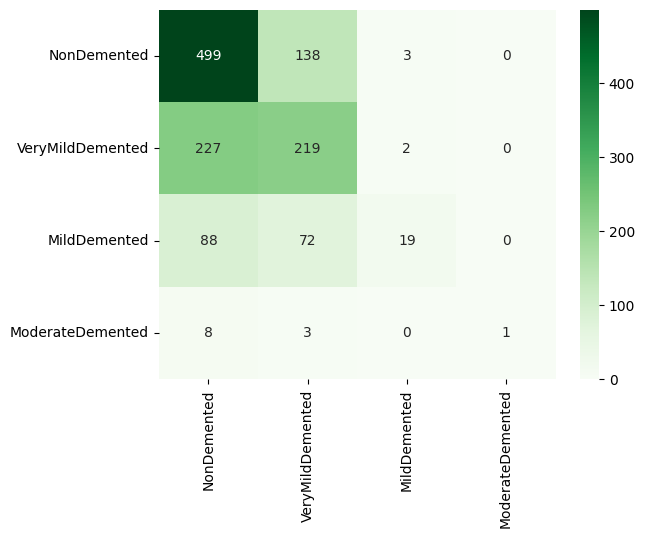

In [ ]:
predictions = np.argmax(predictions, axis=1)
df = pd.DataFrame(data = confusion_matrix(y_test, predictions),
  columns = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'],
  index = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'])
sns.heatmap(df, cmap="Greens", annot=True, fmt='.0f')

In [ ]:
print(classification_report(y_test,predictions,target_names= ['NonDemented', 'VeryMildDemented','MildDemented','ModerateDemented']))

                  precision    recall  f1-score   support

     NonDemented       0.61      0.78      0.68       640
VeryMildDemented       0.51      0.49      0.50       448
    MildDemented       0.79      0.11      0.19       179
ModerateDemented       1.00      0.08      0.15        12

        accuracy                           0.58      1279
       macro avg       0.73      0.36      0.38      1279
    weighted avg       0.60      0.58      0.54      1279



# VGG Net

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(height, width, 3)),
    layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(512, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005,beta_1=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the train set
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=20, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(x_test)
predictions2 = model.predict(x_train)

Epoch 1/20
161/161 [==============================] - 13s 45ms/step - loss: 6.8201 - accuracy: 0.5021 - val_loss: 1.0014 - val_accuracy: 0.5020
Epoch 2/20
161/161 [==============================] - 6s 38ms/step - loss: 0.9326 - accuracy: 0.5665 - val_loss: 1.0238 - val_accuracy: 0.5113
Epoch 3/20
161/161 [==============================] - 6s 38ms/step - loss: 0.8070 - accuracy: 0.6343 - val_loss: 1.8067 - val_accuracy: 0.5004
Epoch 4/20
161/161 [==============================] - 6s 38ms/step - loss: 0.6911 - accuracy: 0.6926 - val_loss: 1.3635 - val_accuracy: 0.5575
Epoch 5/20
161/161 [==============================] - 6s 38ms/step - loss: 0.5255 - accuracy: 0.7696 - val_loss: 1.1628 - val_accuracy: 0.5958
Epoch 6/20
161/161 [==============================] - 6s 37ms/step - loss: 0.3391 - accuracy: 0.8674 - val_loss: 1.3047 - val_accuracy: 0.5676
Epoch 7/20
161/161 [==============================] - 6s 37ms/step - loss: 0.3064 - accuracy: 0.8778 - val_loss: 1.0939 - val_accuracy: 0.626

<Axes: >

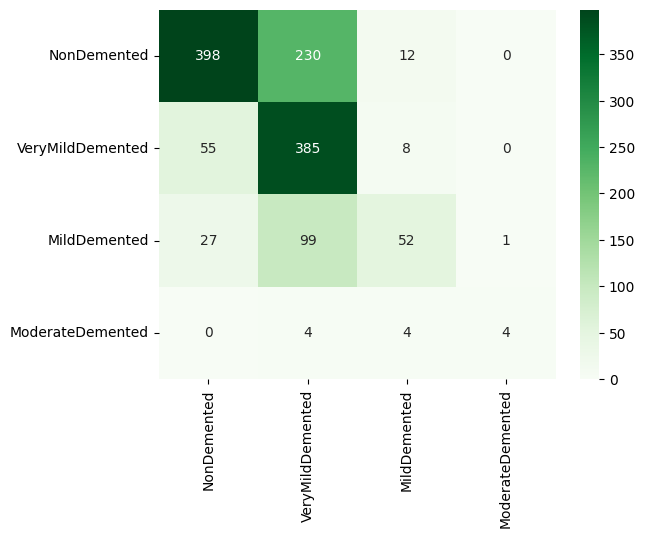

In [ ]:
predictions = np.argmax(predictions, axis=1)
df = pd.DataFrame(data = confusion_matrix(y_test, predictions),
  columns = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'],
  index = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'])
sns.heatmap(df, cmap="Greens", annot=True, fmt='.0f')

In [ ]:
print(classification_report(y_test,predictions,target_names= ['NonDemented', 'VeryMildDemented','MildDemented','ModerateDemented']))

                  precision    recall  f1-score   support

     NonDemented       0.83      0.62      0.71       640
VeryMildDemented       0.54      0.86      0.66       448
    MildDemented       0.68      0.29      0.41       179
ModerateDemented       0.80      0.33      0.47        12

        accuracy                           0.66      1279
       macro avg       0.71      0.53      0.56      1279
    weighted avg       0.71      0.66      0.65      1279



# Google Net

In [ ]:
inputs = layers.Input(shape=(height, width, 3))

# Block 1
x = layers.Conv2D(64, kernel_size=1, strides=1, padding='same', activation='relu')(inputs)
x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

# Block 2
x = layers.Conv2D(96, kernel_size=1, strides=1, padding='same', activation='relu')(x)
x = layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = layers.Conv2D(16, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=1, padding='same')(x)

# Block 3
x = layers.Conv2D(32, kernel_size=1, strides=1, padding='same', activation='relu')(x)

# Concatenate Block 2 and Block 3
x = layers.Concatenate()([x, x])

# Block 4
x = layers.Conv2D(128, kernel_size=1, strides=1, padding='same', activation='relu')(x)
x = layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = layers.Conv2D(32, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=1, padding='same')(x)

# Block 5
x = layers.Conv2D(64, kernel_size=1, strides=1, padding='same', activation='relu')(x)

# Concatenate Block 4 and Block 5
x = layers.Concatenate()([x, x])

# Flatten and fully connected layers
x = layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)

# Output layer
outputs = layers.Dense(4, activation='softmax')(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the train set
model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=25)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(x_test)
predictions2 = model.predict(x_train)

Epoch 1/25
161/161 [==============================] - 15s 57ms/step - loss: 3.6603 - accuracy: 0.4966 - val_loss: 1.0143 - val_accuracy: 0.5074
Epoch 2/25
161/161 [==============================] - 8s 51ms/step - loss: 0.9715 - accuracy: 0.5440 - val_loss: 1.0220 - val_accuracy: 0.5192
Epoch 3/25
161/161 [==============================] - 8s 51ms/step - loss: 0.9416 - accuracy: 0.5690 - val_loss: 0.9858 - val_accuracy: 0.5551
Epoch 4/25
161/161 [==============================] - 8s 51ms/step - loss: 0.9038 - accuracy: 0.5930 - val_loss: 1.0400 - val_accuracy: 0.5184
Epoch 5/25
161/161 [==============================] - 8s 51ms/step - loss: 0.8096 - accuracy: 0.6423 - val_loss: 1.0321 - val_accuracy: 0.5246
Epoch 6/25
161/161 [==============================] - 8s 51ms/step - loss: 0.7803 - accuracy: 0.6557 - val_loss: 0.9967 - val_accuracy: 0.5465
Epoch 7/25
161/161 [==============================] - 8s 51ms/step - loss: 0.6757 - accuracy: 0.7098 - val_loss: 1.2345 - val_accuracy: 0.537

<Axes: >

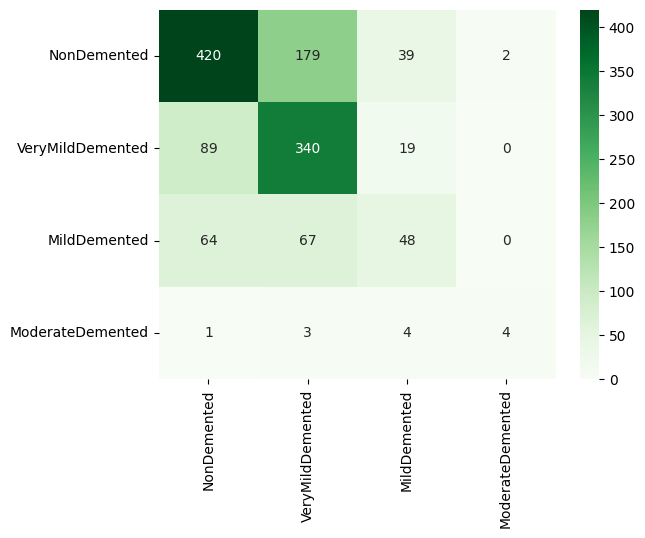

In [ ]:
predictions = np.argmax(predictions, axis=1)
df = pd.DataFrame(data = confusion_matrix(y_test, predictions),
  columns = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'],
  index = ['NonDemented','VeryMildDemented', 'MildDemented','ModerateDemented'])
sns.heatmap(df, cmap="Greens", annot=True, fmt='.0f')

In [ ]:
print(classification_report(y_test,predictions,target_names= ['NonDemented', 'VeryMildDemented','MildDemented','ModerateDemented']))

                  precision    recall  f1-score   support

     NonDemented       0.73      0.66      0.69       640
VeryMildDemented       0.58      0.76      0.66       448
    MildDemented       0.44      0.27      0.33       179
ModerateDemented       0.67      0.33      0.44        12

        accuracy                           0.63      1279
       macro avg       0.60      0.50      0.53      1279
    weighted avg       0.64      0.63      0.63      1279



# Underclassing for 2 Classes to classify

In [ ]:
y_train_new = [0 if x==0 else 1 for x in y_train]
y_test_new = [0 if x==0 else 1 for x in y_test]
y_train_new = np.array(y_train_new)
y_test_new = np.array(y_test_new)
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(height, width, 3)),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),
    layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),
    layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),
    layers.Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0002,beta_1=0.9),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training
#model.fit(x_train, y_train_new,validation_data=(x_test,y_test_new),epochs=20)
train_acc_values = []
val_acc_values = []

# Training loop
for epoch in range(150):
    # Train the model
    print("Epoch ",epoch+1,":")
    history = model.fit(x_train, y_train_new, validation_data=(x_test, y_test_new), epochs=1)

    # Get the accuracy values from the history
    train_acc = history.history['accuracy'][0]
    val_acc = history.history['val_accuracy'][0]

    # Append the accuracy values to the lists
    train_acc_values.append(train_acc)
    val_acc_values.append(val_acc)

# Evaluation on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_new)
print(f'Loss: {test_loss:.4f}')
print(f'Accuracy on the test set: {test_accuracy*100:.2f}%')

predictions = model.predict(x_test)

Epoch  1 :
161/161 [==============================] - 16s 18ms/step - loss: 7.5531 - accuracy: 0.5091 - val_loss: 0.6929 - val_accuracy: 0.5051
Epoch  2 :
161/161 [==============================] - 2s 13ms/step - loss: 0.7025 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.5035
Epoch  3 :
161/161 [==============================] - 2s 13ms/step - loss: 0.6970 - accuracy: 0.5085 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch  4 :
161/161 [==============================] - 2s 13ms/step - loss: 0.6957 - accuracy: 0.5075 - val_loss: 0.6929 - val_accuracy: 0.5020
Epoch  5 :
161/161 [==============================] - 2s 13ms/step - loss: 0.6938 - accuracy: 0.5103 - val_loss: 0.6928 - val_accuracy: 0.5020
Epoch  6 :
161/161 [==============================] - 2s 13ms/step - loss: 0.6947 - accuracy: 0.5095 - val_loss: 0.6925 - val_accuracy: 0.5676
Epoch  7 :
161/161 [==============================] - 2s 13ms/step - loss: 0.6926 - accuracy: 0.5241 - val_loss: 0.6928 - val_accuracy: 0.544

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 208, 176, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 104, 88, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 104, 88, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 88, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 44, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 52, 44, 64)        0

<Axes: >

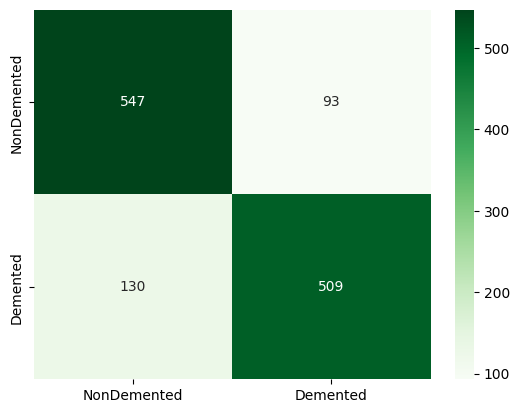

In [ ]:
predictions = np.argmax(predictions, axis=1)
df = pd.DataFrame(data = confusion_matrix(y_test_new, predictions),
  columns = ['NonDemented', 'Demented'],
  index = ['NonDemented', 'Demented'])
sns.heatmap(df, cmap="Greens", annot=True, fmt='.0f')

In [ ]:
print(classification_report(y_test_new,predictions,target_names= ['NonDemented', 'Demented']))

              precision    recall  f1-score   support

 NonDemented       0.81      0.85      0.83       640
    Demented       0.85      0.80      0.82       639

    accuracy                           0.83      1279
   macro avg       0.83      0.83      0.83      1279
weighted avg       0.83      0.83      0.83      1279



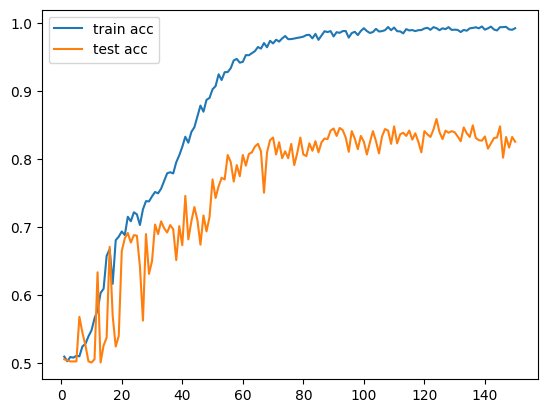

In [ ]:
lenx = [i+1 for i in range(len(train_acc_values))]
plt.plot(lenx, train_acc_values, label = "train acc")
plt.plot(lenx, val_acc_values, label = "test acc")
plt.legend()
plt.show()